## Case Study: Mobile Price Classification

<img src="https://cdn.vox-cdn.com/thumbor/gtKIGw_MBshxBVCrar7nDmYyZQU=/0x0:1920x1080/1200x628/filters:focal(960x540:961x541)/cdn.vox-cdn.com/uploads/chorus_asset/file/15965346/bigpic_money.jpg" width=500 height = 280 />

Data to be used: *mobile.csv*

Following is the description of columns in *mobile.csv* file

<TABLE CAPTION="Mobile Dataset">
<TR><TD><B>Variable</B></TD><TD><B>Description</B></TD></TR>
<TR><TD>battery_power</TD><TD>Total energy a battery can store in one time measured in mAh</TD></TR>
<TR><TD>blue</TD><TD>Has bluetooth or not</TD></TR>
<TR><TD>clock_speed</TD><TD>Speed at which microprocessor executes instructions</TD></TR>
<TR><TD>dual_sim</TD><TD>Has dual sim support or not</TD></TR>
<TR><TD>fc</TD><TD>Front Camera mega pixels</TD></TR>
<TR><TD>four_g</TD><TD>Has 4G or not</TD></TR>   
<TR><TD>int_memory</TD><TD>Internal memory in GB</TD></TR>
<TR><TD>m_dep</TD><TD>Mobile Depth in cm</TD></TR>
<TR><TD>mobile_wt</TD><TD>Weight of mobile phone</TD></TR>
<TR><TD>n_cores</TD><TD>Number of cores of processor</TD></TR>
<TR><TD>pc</TD><TD>Primary camera mega pixels</TD></TR>
<TR><TD>px_height</TD><TD>Pixel resolution height</TD></TR>
<TR><TD>px_width</TD><TD>Pixel resolution width</TD></TR>
<TR><TD>ram</TD><TD>Random Access Memory (RAM) in MB</TD></TR>
<TR><TD>sc_h</TD><TD>Screen height in cm</TD></TR>
<TR><TD>sc_w</TD><TD>Screen width in cm</TD></TR>
<TR><TD>talk_time</TD><TD>longest time that a single battery charge will last</TD></TR>
<TR><TD>three_g</TD><TD>Has 3G or not</TD></TR>
<TR><TD>touch_screen</TD><TD>Has touch screen or not</TD></TR>
<TR><TD>wifi</TD><TD>Has wifi or not</TD></TR>
<TR><TD>price_range</TD><TD>Price range of mobile</TD></TR>
</TABLE>

In `price_range` Column, we have following cost classes:

- Low cost
- Medium cost
- High cost
- Very high cost

In [100]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeClassifier     # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import KFold # For creating folds

# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [101]:
# Import Data
mobile_df = pd.read_csv('mobile.csv')
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,Medium cost
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,High cost
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,High cost
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,High cost
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,Medium cost


In [102]:
# Summary of the data
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [103]:
# Distribution of Personal Loan column
mobile_df['price_range'].value_counts(normalize = True)

Medium cost       0.25
High cost         0.25
Very high cost    0.25
Low cost          0.25
Name: price_range, dtype: float64

In [104]:
# Select input and output features
X = mobile_df.drop(columns = ['price_range'])
y = mobile_df['price_range']

In [105]:
# One hot encoding for categorical variables
cat_var = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
X_encoded = pd.get_dummies(X, columns = cat_var)
X_encoded.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,dual_sim_No,dual_sim_Yes,four_g_No,four_g_Yes,three_g_No,three_g_Yes,touch_screen_No,touch_screen_Yes,wifi_No,wifi_Yes
0,842,2.2,1,7,0.6,188,2,2,20,756,...,1,0,1,0,1,0,1,0,0,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,0,1,0,1,0,1,0,1,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,0,1,0,1,0,1,0,1,1,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,1,0,1,0,0,1,1,0,1,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,1,0,0,1,0,1,0,1,1,0


In [106]:
y.head()

0    Medium cost
1      High cost
2      High cost
3      High cost
4    Medium cost
Name: price_range, dtype: object

In [107]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

### Model 1: Random Forest

#### **Hyperparameters of Random Forest**

#### `n_estimators`: 
- The number of decision trees in the forest. 
- Default = 100
- Input options → integer

#### `max_depth`:
- The maximum depth of the tree.
- Default = None
- Input options → integer

#### `min_samples_split`:
- The minimum samples required to split an internal node. 
- Default = 2
- Input options → integer

#### `min_samples_leaf`:
- The minimum samples required to be at a leaf node. 
- Default = 1
- Input options → integer

In [108]:
# Define your model
classifier = RandomForestClassifier(random_state = 42)

#### Hyperparameter Tuning

**Step 1: Starting with Randomized Cross Validation**

In [109]:
# Start with an initial guess for parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


Note:
- The `pprint` module provides a capability to “pretty-print” arbitrary Python data structures

In [110]:
# Creating folds
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 1,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

In [111]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training time: 28.841349124908447s


In [112]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.8480612451604311
Initial parameters:  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 18}


**Step 2: Getting Optimal Hyperparameter Values using Grid Search CV**

In [113]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [17, 18, 19],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [500, 550, 600, 650]
}

pprint(param_grid)

{'max_depth': [17, 18, 19],
 'min_samples_leaf': [2, 3, 4, 5],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [500, 550, 600, 650]}


In [114]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [115]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Training time: 108.96714282035828s


In [116]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.8562576528634024
Improved parameters:  {'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}


**Confusion Matrix**

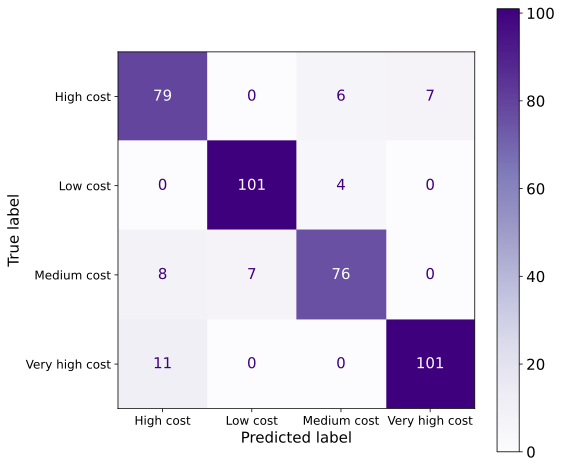

In [130]:
# Predictions on test set
y_pred = model_cv.predict(test_X)

# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = model_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_cv.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size': 15})
plt.yticks(fontsize = 12) # fontsize of yticks
plt.xticks(fontsize = 12) # fontsize of xticks

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);

**Classification Report**

In [132]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df
# report_df.to_csv('rf_class_report.csv') 

,High cost,Low cost,Medium cost,Very high cost,accuracy,macro avg,weighted avg
precision,0.806122,0.935185,0.883721,0.935185,0.8925,0.890053,0.893793
recall,0.858696,0.961905,0.835165,0.901786,0.8925,0.889388,0.892500
f1-score,0.831579,0.948357,0.858757,0.918182,0.8925,0.889219,0.892665
support,92.000000,105.000000,91.000000,112.000000,0.8925,400.000000,400.000000


**Feature Importance Plot**

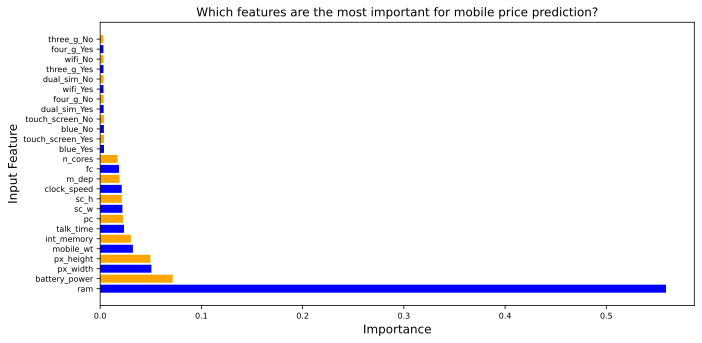

In [133]:
# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'orange'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for mobile price prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

plt.tight_layout();

**Save Random Forest Model as Pickle File**

In [134]:
# Creating the file where we want to write the model
rf_pickle = open('rf_mobile.pickle', 'wb') 

# Write RF model to the file
pickle.dump(model_cv, rf_pickle) 

# Close the file
rf_pickle.close()

### Decision Tree

In [135]:
# Define your model
classifier = DecisionTreeClassifier(random_state = 42)

#### Hyperparameter Tuning

**Step 1: Starting with Randomized Cross Validation**

In [136]:
# Start with an initial guess for parameters
hyper_params = {
    'max_depth': [100, 200, 300, 400],
    'min_samples_split': [20, 40, 60],
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

In [137]:
# Creating folds
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = hyper_params,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 1,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

In [138]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Training time: 3.6480588912963867s


In [139]:
# Return the performance metric score
print('Initial score: ', model_cv.best_score_)

# Return set of parameters with the best performance
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.8382565727416232
Initial parameters:  {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 100}


**Step 2: Getting Optimal Hyperparameter Values using Grid Search CV**

In [140]:
# Adapt grid based on result from initial grid search
hyper_params_new = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': list(range(2, 12)),
    'min_samples_split': list(range(2, 12))
}

hyper_params_new

{'max_depth': [5, 10, 20, 30],
 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [141]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier, 
                        param_grid = hyper_params_new, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [142]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Training time: 1.8754487037658691s


In [143]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.8421826527051057
Improved parameters:  {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 2}


**Confusion Matrix**

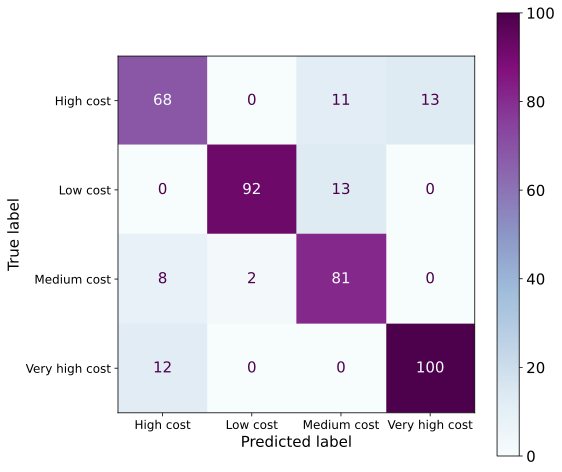

In [144]:
# Predictions on test set
y_pred = model_cv.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = model_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_cv.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size': 15})
plt.yticks(fontsize = 12) # fontsize of yticks
plt.xticks(fontsize = 12) # fontsize of xticks

# Display Confusion Matrix
disp.plot(cmap = 'BuPu', ax = ax);

**Classification Report**

In [147]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df
# report_df.to_csv('dt_class_report.csv') 

,High cost,Low cost,Medium cost,Very high cost,accuracy,macro avg,weighted avg
precision,0.772727,0.978723,0.771429,0.884956,0.8525,0.851959,0.857930
recall,0.739130,0.876190,0.890110,0.892857,0.8525,0.849572,0.852500
f1-score,0.755556,0.924623,0.826531,0.888889,0.8525,0.848900,0.853416
support,92.000000,105.000000,91.000000,112.000000,0.8525,400.000000,400.000000


**Feature Importance**

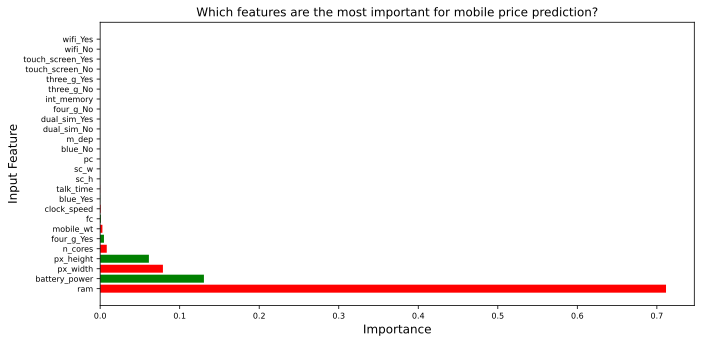

In [148]:
# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'green'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for mobile price prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

plt.tight_layout();

**Save Decision Tree Model as Pickle File**

In [149]:
# Creating the file where we want to write the model
dt_pickle = open('dt_mobile.pickle', 'wb') 

# Write DT model to the file
pickle.dump(model_cv, dt_pickle) 

# Close the file
dt_pickle.close() 